<a href="https://colab.research.google.com/github/karanm21/IITG_Research_Intern/blob/main/Beats_IITG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wfdb

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import pandas as pd
import wfdb

In [ ]:
import os
wfdb.dl_database('mitdb', os.path.join(os.getcwd(), 'mitdb'))

In [ ]:
from wfdb import processing
import numpy as np
import pandas as pd
import pywt
import sys
from scipy import signal
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]
from sklearn import svm
# from sklearn_rvm import EMRVC
# from skrvm import RVC
from scipy.signal import find_peaks
from scipy.signal import decimate
from sklearn.decomposition import PCA

In [ ]:
wfdb.show_ann_labels()

In [ ]:
records = [['mitdb/100','mitdb/101','mitdb/102', 'mitdb/103', 'mitdb/105', 'mitdb/106', 'mitdb/111', 'mitdb/112',
                 'mitdb/113','mitdb/115', 'mitdb/116', 'mitdb/118', 'mitdb/121', 'mitdb/122',  'mitdb/123', 'mitdb/124',
                 'mitdb/209','mitdb/210','mitdb/230','mitdb/231', 'mitdb/232', 'mitdb/234',
                 'mitdb/221','mitdb/222', 'mitdb/223', 'mitdb/228']]

In [ ]:
def get_beats(beat,records, listX1,listY,ind,ref = 417):
    beats_set = []

    for e in records: #first it will run for 101

        signals, fields = wfdb.rdsamp(e, channels = [0]) #101 has two channels,it took first channel
        ann = wfdb.rdann(e, 'atr')
        ids = np.in1d(ann.symbol, beat) #Test whether each element of a 1-D array is also present in a second array.here first N to match from N
        imp_beats = ann.sample[ids]  #take samples where ids is true, in first case imp_beats are normal beats
        beats = (ann.sample) #this is all beats
        signals=signals.flatten().tolist()
        for i in imp_beats:
            listX=np.array([])
            beats = list(beats)

            j = beats.index(i)
            if(j!=0 and j!=(len(beats)-1)):
                x = beats[j-1]
                y = beats[j+1]
                diff1_i = abs(x + beats[j])//2  #R[j-1]+R[j]/2
                diff2_i = abs(y + beats[j])//2

                         #for R peak in c
                if(diff2_i-diff1_i>=ref):
                    listX=np.concatenate((listX,signals[i-208:i+209]),axis=None)
                else:
                    if(i-diff1_i<208):
                        listX=np.concatenate((listX,np.zeros(208-(i-diff1_i),dtype='float')),axis=None)
                        listX=np.concatenate((listX,signals[diff1_i:i+1]),axis=None)
                    else:
                        listX=np.concatenate((listX,signals[i-208:i+1]),axis=None)

                    if(diff2_i-i<208):
                        listX=np.concatenate((listX,signals[i:diff2_i]),axis=None)
                        listX=np.concatenate((listX,np.zeros(208-(diff2_i-i),dtype='float')),axis=None)
                    else:
                        listX=np.concatenate((listX,signals[i:i+209]),axis=None)
            # for fl in listX:
            #     float(fl)
            floats = []
            for element in listX:
                #floats=np.append(floats,float(element))
                floats.append(float(element))

            #listX=np.append(listX,floats)

            # listX1=np.concatenate((listX1,listX),axis=0)
            # listY=np.concatenate((listY,ind),axis=0)
            #return [listX1,listY]
            #to take inner 210 samples of beats
            if(len(floats)==417):
                listX1.append(np.array(floats[103:313]))
                listY.append(np.array(ind))

                # for i in listX1:
                #     plt.plot(i)

In [ ]:
ecg_beats = [['N'],['L'],['R'],['A'],['a'],['J'],['S'],['V'],['F'],['e'],['j'],['E'],['/'],['f'],['Q']]

listX = []
listY = []
for i in range(15):
    get_beats(ecg_beats[i],records[0],listX,listY,i)


In [ ]:
listX

In [ ]:
X_prepared_prev = np.array(listX,dtype='float64')
Y_prepared = np.array(listY,dtype='float64')

# X_prepared= np.array(temp_list,dtype='float64')
X_prepared= np.array(X_prepared_prev,dtype='float64')
print(X_prepared.shape)

In [ ]:
Y_prepared_ind = 0
for i in Y_prepared:
    if i==0 or i==1 or i==2 or i==9 or i==10:
        Y_prepared[Y_prepared_ind]=0
    elif i==3 or i==4 or i==5 or i==6:
        Y_prepared[Y_prepared_ind]=1
    elif i==7 or i==11:
        Y_prepared[Y_prepared_ind]=2
    elif i==8:
        Y_prepared[Y_prepared_ind]=3
    elif i==12 or i==13 or i==14:
        Y_prepared[Y_prepared_ind]=4
    Y_prepared_ind+=1

In [ ]:
lable = [0,0,0,0,0]

ind_i = 0
for i in Y_prepared:
    if i==0:
        lable[0]+=1
    elif i==1:
        lable[1]+=1
    elif i==2:
        lable[2]+=1
    elif i==3:
        lable[3]+=1
    elif i==4:
        lable[4]+=1
    ind_i = ind_i+1

ecg_beats = [['N'],['S'],['V'],['F'],['Q']]
print(lable)
print(ecg_beats)

In [ ]:
print(X_prepared.shape, Y_prepared.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
Y_prepared = le.fit_transform(Y_prepared)
Y_prepared = to_categorical(Y_prepared, 5)
(trainX, testX, trainY, testY) = train_test_split(X_prepared,Y_prepared, test_size=0.25, random_state=500) #test_size=0.25
print(Y_prepared)

In [ ]:
# import keras
# from keras import optimizers, losses, activations, models
# from keras.layers import Conv1D , MaxPooling1D , Dense ,Activation, Dropout ,GlobalMaxPooling1D , Input , Flatten
# from keras.optimizers import Adam
# from keras import layers
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.layers import Conv1D , MaxPooling1D , Dense ,Activation, Dropout ,GlobalMaxPooling1D , Input , Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
# import plotting

In [ ]:
## model testing:

model = keras.Sequential()
model.add(keras.Input(shape=(210,)))
model.add(layers.Dense(35,name='Dense_D1',activation='relu'))
model.add(layers.Dense(25,name='Dense_D2',activation='relu'))
#model.add(layers.Dense(10,name='Dense_D3',activation='relu'))
model.add(layers.Dense(5,name='Dense_D3',activation='softmax'))

opt = optimizers.Adam(0.001)
model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_D1 (Dense)            (None, 35)                7385      
                                                                 
 Dense_D2 (Dense)            (None, 25)                900       
                                                                 
 Dense_D3 (Dense)            (None, 5)                 130       
                                                                 
Total params: 8,415
Trainable params: 8,415
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights_assigned={0:1,1:1000,2:1,3:1,4:1}
#weights_assigned={0:1,1:46,2:13,3:105,4:10829}

#%%
model.fit(np.array(trainX) ,trainY ,class_weight=weights_assigned,batch_size = 50 ,epochs = 1000)

#%%
#model.fit(trainX ,trainY ,batch_size = 128 ,epochs = 200,)

Epoch 1/1000
845/845 [==============================] - 4s 3ms/step - loss: 6.5167 - accuracy: 0.0904
Epoch 2/1000
845/845 [==============================] - 3s 3ms/step - loss: 3.1567 - accuracy: 0.2291
Epoch 3/1000
845/845 [==============================] - 3s 4ms/step - loss: 2.4393 - accuracy: 0.3720
Epoch 4/1000
845/845 [==============================] - 3s 3ms/step - loss: 2.3410 - accuracy: 0.4217
Epoch 5/1000
845/845 [==============================] - 4s 5ms/step - loss: 2.2008 - accuracy: 0.4612
Epoch 6/1000
845/845 [==============================] - 4s 5ms/step - loss: 2.4804 - accuracy: 0.4964
Epoch 7/1000
845/845 [==============================] - 2s 3ms/step - loss: 2.0469 - accuracy: 0.5277
Epoch 8/1000
845/845 [==============================] - 2s 3ms/step - loss: 1.7459 - accuracy: 0.5539
Epoch 9/1000
845/845 [==============================] - 2s 3ms/step - loss: 1.6842 - accuracy: 0.5861
Epoch 10/1000
845/845 [==============================] - 3s 3ms/step - loss: 1.516

In [ ]:
score = model.evaluate(testX , testY , batch_size = 50)

282/282 [==============================] - 1s 2ms/step - loss: 0.2246 - accuracy: 0.9643


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
score

[0.22461390495300293, 0.9643339514732361]

In [ ]:
predictY = model.predict(testX)
testY_class = np.argmax(testY , axis = 1)
predictY_class = np.argmax(predictY , axis = 1)

440/440 [==============================] - 1s 1ms/step


In [ ]:
conf_mat_test = confusion_matrix(testY_class , predictY_class)

In [ ]:
# predictY = model.predict(np.array(testX))
# conf_mat_test=confusion_matrix(testY , predictY)
FP = conf_mat_test.sum(axis=0) - np.diag(conf_mat_test)
FN = conf_mat_test.sum(axis=1) - np.diag(conf_mat_test)
TP = np.diag(conf_mat_test)
TN = conf_mat_test.sum() - (FP + FN + TP)
FP = FP.astype(float)
print(FP)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
#%%
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP)
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)
#%%
dr=[]
nr=[]
MCC=[]
import math as mp
for i in range(len(TP)-1):
    dr.append(mp.sqrt((TP[i]+FP[i])*(TP[i]+FN[i])*(TN[i]+FP[i])*(TN[i]+FN[i])))
    nr.append((TP[i]*TN[i])-(FP[i]*FN[i]))
    # print(dr)
    # print(nr)
    MCC.append(nr[i]/dr[i])

print(dr)
print(nr)
print(MCC)
#%%

[ 27. 438.  27.   8.   2.]
[0.96366975 0.97573657 0.9522673  0.         0.98366606]
[0.98259188 0.96755075 0.99802285 0.99943145 0.99985211]
[0.99776786 0.56243756 0.93661972 0.         0.99632353]
[0.96575488 0.96788632 0.99666075 0.99914742 0.99921847]
[21563597.38810795, 10095873.436191838, 5767983.136204197, 79586.2816319496]
[18380871.0, 7346648.0, 5437431.0, -32.0]
[0.8524028096599882, 0.7276882031487861, 0.9426919031490568, -0.00040207934513118054]


In [ ]:
model.save('Assignment-1.h5')

In [ ]:
from tensorflow.keras import models
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#%%
def roc_all_in_one(label):
    plt.figure(1)
    for i in range(5):
        fpr,tpr,thresh = roc_curve(testY[:,i],y_preds[:,i])
        plt.plot([0,1],[0,1],'y--')
        plt.plot(fpr,tpr,label= label[i])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ')
    plt.legend()

    plt.show()
    plt.savefig('all_in_one.png')

440/440 [==============================] - 1s 3ms/step


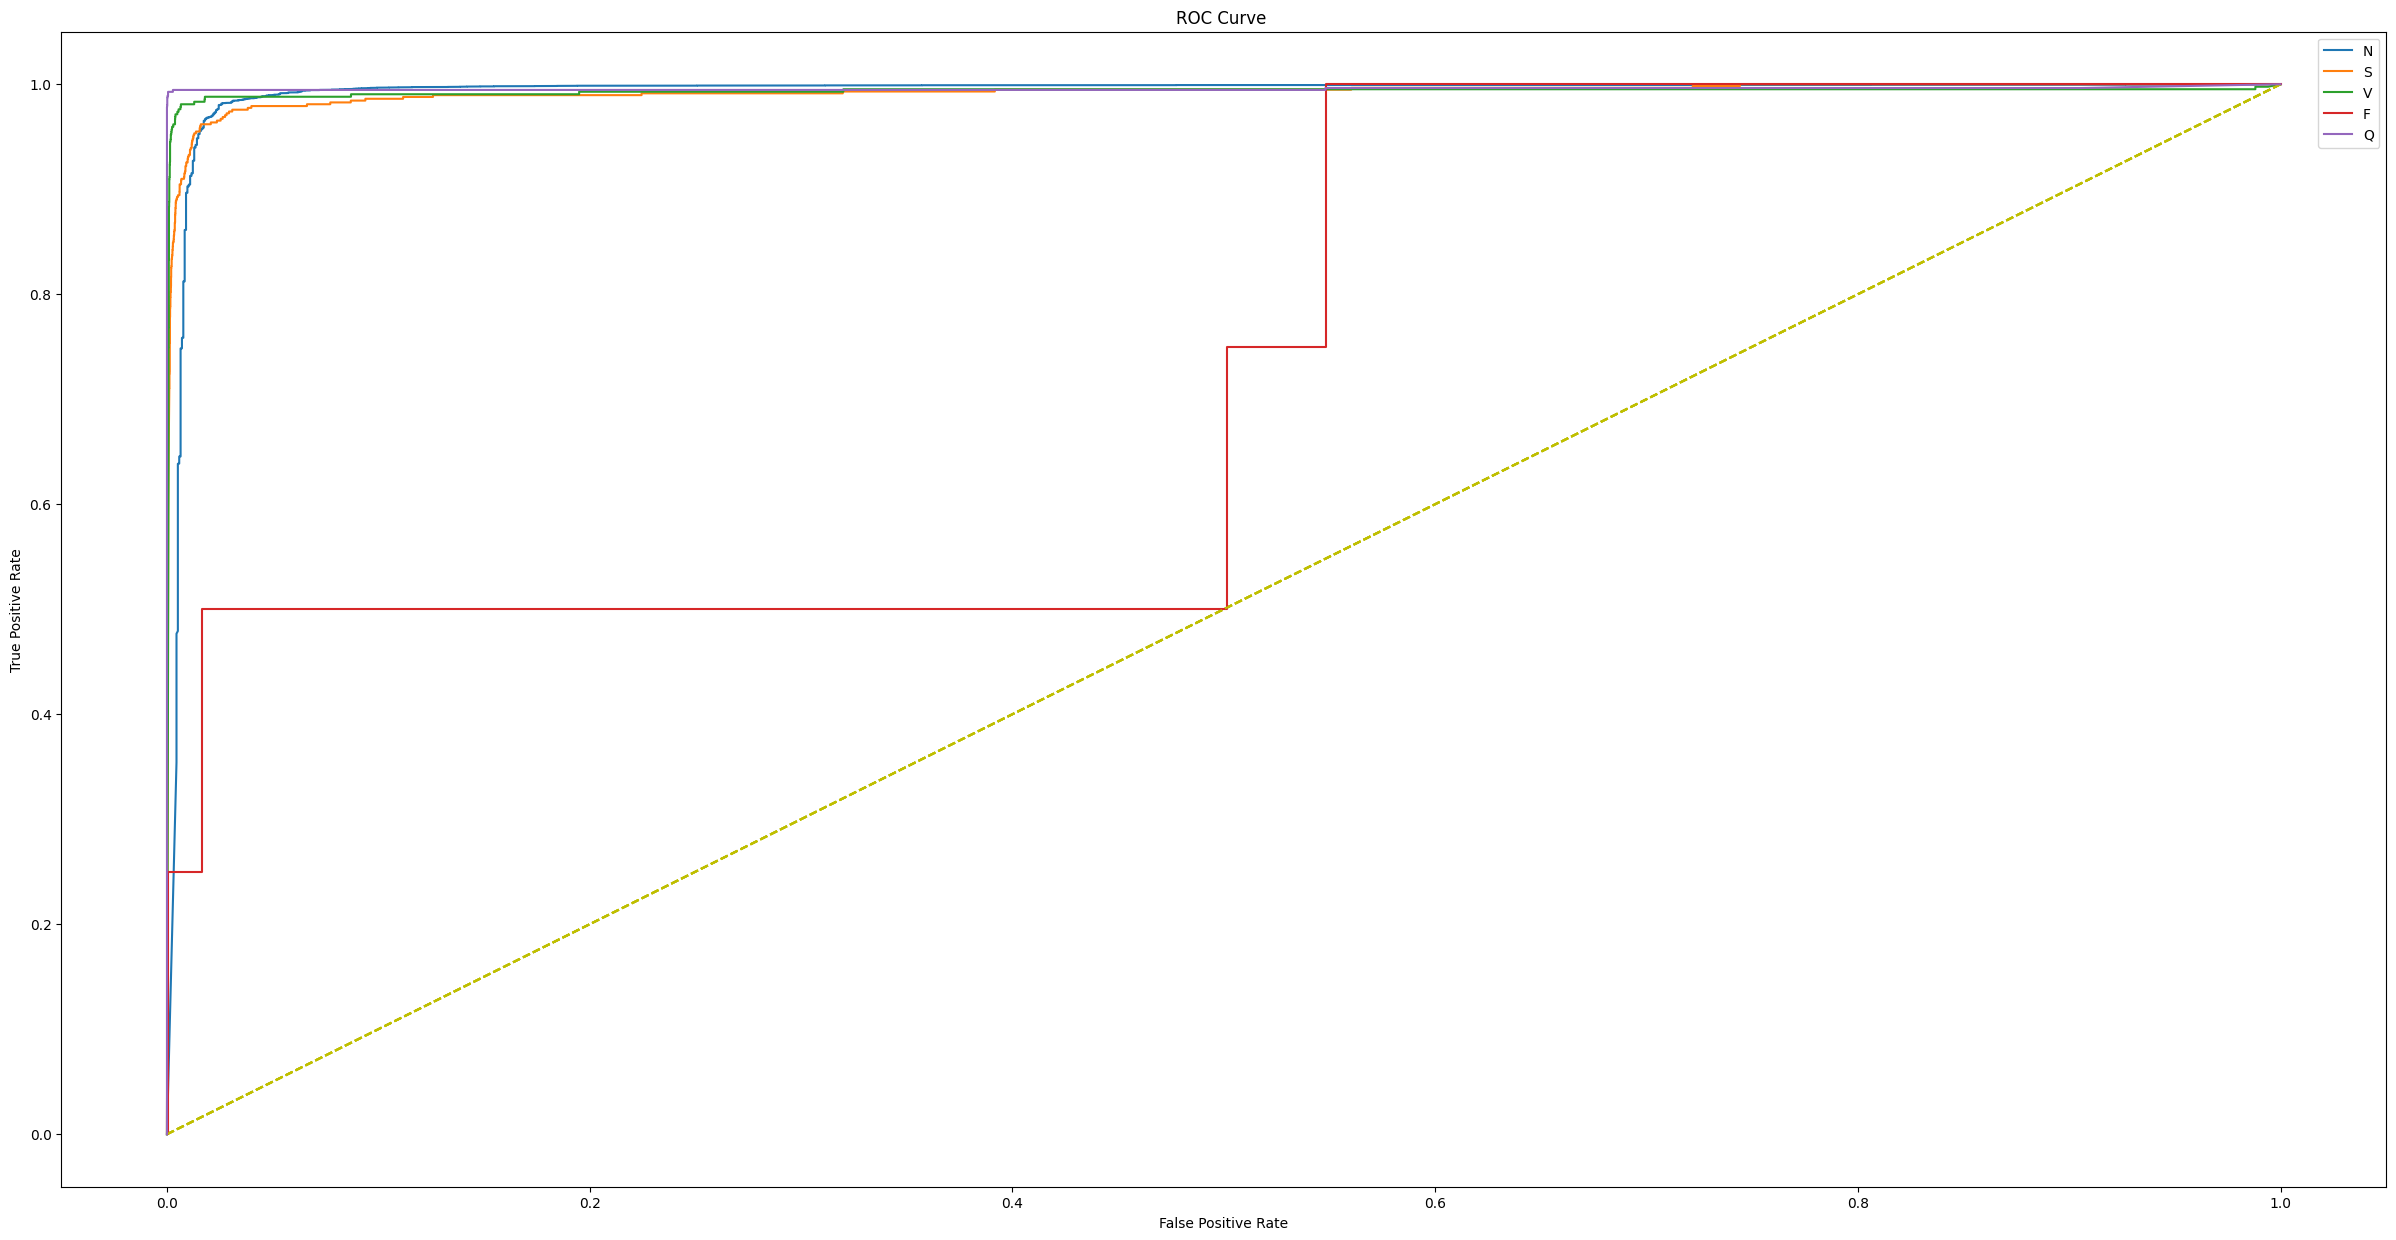

<Figure size 3000x1500 with 0 Axes>

In [ ]:
y_preds = model.predict(np.array(testX))
#%%

label = ['N','S','V','F','Q']
#%%

roc_all_in_one(label)

In [ ]:
print("Area Under the ROC Curve \n")
for i in range(5):
    print(label[i],end=" ")
    print(roc_auc_score(testY[:,i],y_preds[:,i]))

Area Under the ROC Curve 

N 0.9926451464638572
S 0.9920420844168967
V 0.9930672067703813
F 0.7331568474166725
Q 0.9955382137073248


In [ ]:
# # In[ ]://same is fed to test bench in vivado
# Xnew = [[-0.355,-0.365,-0.345,-0.35,-0.34,-0.345,-0.35,-0.345,-0.34,-0.36,-0.34,-0.32,-0.32,-0.32,-0.325,-0.35,-0.32,-0.305,-0.32,-0.325,-0.29,-0.32,-0.325,-0.31,-0.325,-0.31,-0.31,-0.33,-0.315,-0.315,-0.34,-0.31,-0.32,-0.33,-0.335,-0.32,-0.34,-0.335,-0.33,-0.32,-0.325,-0.315,-0.335,-0.325,-0.33,-0.35,-0.335,-0.31,-0.355,-0.32,-0.31,-0.32,-0.315,-0.32,-0.32,-0.31,-0.315,-0.31,-0.28,-0.29,-0.295,-0.275,-0.22,-0.215,-0.145,-0.15,-0.21,-0.215,-0.21,-0.235,-0.25,-0.24,-0.27,-0.3,-0.325,-0.325,-0.315,-0.305,-0.305,-0.315,-0.32,-0.355,-0.35,-0.35,-0.335,-0.32,-0.325,-0.34,-0.35,-0.325,-0.305,-0.31,-0.325,-0.36,-0.355,-0.36,-0.355,-0.36,-0.37,-0.27,-0.085,0.135,0.385,0.69,0.945,1.02,0.89,0.605,0.345,0.115,-0.055,-0.14,-0.185,-0.235,-0.24,-0.25,-0.27,-0.3,-0.315,-0.34,-0.37,-0.38,-0.405,-0.395,-0.385,-0.375,-0.365,-0.375,-0.395,-0.415,-0.42,-0.405,-0.39,-0.41,-0.4,-0.41,-0.395,-0.395,-0.425,-0.395,-0.4,-0.405,-0.385,-0.385,-0.405,-0.4,-0.385,-0.415,-0.39,-0.37,-0.4,-0.37,-0.365,-0.375,-0.355,-0.34,-0.345,-0.32,-0.33,-0.33,-0.3,-0.255,-0.255,-0.235,-0.21,-0.215,-0.185,-0.15,-0.145,-0.115,-0.125,-0.13,-0.12,-0.115,-0.125,-0.13,-0.16,-0.19,-0.19,-0.195,-0.235,-0.235,-0.24,-0.275,-0.275,-0.28,-0.31,-0.305,-0.295,-0.32,-0.3,-0.315,-0.32,-0.305,-0.31,-0.3,-0.3,-0.295,-0.295,-0.285,-0.275,-0.285,-0.275,-0.27,-0.295,-0.275,-0.265,-0.27,-0.27,-0.26]]
# # make a predictio
# ynew = model.predict(Xnew)

# #%%
# xnew2=[[-0.605,-0.715,-0.465,-0.47,-0.435,-0.4,-0.405,-0.455,-0.42,-0.41,-0.42,-0.485,-0.475,-0.42,-0.45,-0.47,-0.44,-0.405,-0.375,-0.44,-0.47,-0.405,-0.405,-0.355,-0.39,-0.395,-0.325,-0.335,-0.385,-0.28,-0.3,-0.315,-0.26,-0.25,-0.245,-0.155,-0.1,-0.14,-0.06,-0.015,0.0,0.075,0.125,0.145,0.185,0.2,0.23,0.285,0.235,0.205,0.23,0.21,0.185,0.065,-0.025,-0.005,0.005,-0.04,-0.095,-0.11,-0.19,-0.19,-0.2,-0.235,-0.23,-0.23,-0.28,-0.305,-0.255,-0.255,-0.27,-0.345,-0.33,-0.245,-0.245,-0.3,-0.28,-0.28,-0.3,-0.28,-0.265,-0.265,-0.255,-0.24,-0.23,-0.22,-0.215,-0.235,-0.25,-0.24,-0.215,-0.19,-0.17,-0.125,-0.065,0.0,0.03,0.025,0.035,0.055,0.115,0.205,0.31,0.425,0.53,0.535,0.44,0.295,0.125,-0.02,-0.15,-0.29,-0.43,-0.585,-0.77,-0.995,-1.2,-1.34,-1.39,-1.345,-1.29,-1.2,-1.17,-1.185,-1.215,-1.225,-1.195,-1.165,-1.165,-1.175,-1.17,-1.09,-0.98,-0.865,-0.81,-0.765,-0.62,-0.585,-0.56,-0.445,-0.35,-0.395,-0.345,-0.29,-0.28,-0.235,-0.225,-0.24,-0.2,-0.205,-0.205,-0.17,-0.255,-0.225,-0.155,-0.075,-0.1,-0.1,-0.03,0.035,0.105,0.135,0.13,0.205,0.31,0.39,0.43,0.53,0.55,0.6,0.675,0.72,0.695,0.645,0.575,0.59,0.59,0.505,0.44,0.41,0.325,0.265,0.32,0.215,0.095,0.105,0.06,0.05,0.03,-0.05,-0.095,-0.03,-0.115,-0.135,-0.105,-0.135,-0.17,-0.16,-0.145,-0.11,-0.115,-0.18,-0.265,-0.225,-0.225,-0.265,-0.255,-0.235,-0.25,-0.25]]

# ynew2 = model.predict(xnew2)